![](Captura.PNG)

# Inteligencia Artificial
## Arboles de decisión Dataset Covid

## Nombre docente
### M.T.I Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Alan Aarón Martínez Castillo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 

datos = pd.read_csv("covi.csv",encoding = "ISO-8859-1")


Como en nuestra practica de el Titanic teniamos nuestros datos dividos, aqui lo que hemos hecho es dividirlos entre training y testing, para hace realizar el entrenamiento de nuestro modelo.

In [4]:
datos["FECHA_DEF"] = datos["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)
training, testing = train_test_split(datos, test_size = 0.35)
training.info()
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571745 entries, 672204 to 9924
Data columns (total 35 columns):
FECHA_ACTUALIZACION    571745 non-null object
ID_REGISTRO            571745 non-null object
ORIGEN                 571745 non-null int64
SECTOR                 571745 non-null int64
ENTIDAD_UM             571745 non-null int64
SEXO                   571745 non-null int64
ENTIDAD_NAC            571745 non-null int64
ENTIDAD_RES            571745 non-null int64
MUNICIPIO_RES          571745 non-null int64
TIPO_PACIENTE          571745 non-null int64
FECHA_INGRESO          571745 non-null object
FECHA_SINTOMAS         571745 non-null object
FECHA_DEF              571745 non-null int64
INTUBADO               571745 non-null int64
NEUMONIA               571745 non-null int64
EDAD                   571745 non-null int64
NACIONALIDAD           571745 non-null int64
EMBARAZO               571745 non-null int64
HABLA_LENGUA_INDIG     571745 non-null int64
DIABETES               5717

In [76]:
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
93256,2020-07-23,1799f9,2,12,16,1,16,16,77,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
447677,2020-07-23,11fa69,2,4,15,1,13,15,33,1,...,2,2,2,2,99,2,99,MÃ©xico,99,97
324173,2020-07-23,1aa193,1,4,9,2,30,9,2,2,...,2,1,2,2,99,2,99,MÃ©xico,99,2
640326,2020-07-23,04b1bf,2,4,14,1,9,14,98,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
467412,2020-07-23,13abaa,2,12,14,1,15,14,101,1,...,2,2,2,2,1,2,99,MÃ©xico,99,97
583727,2020-07-23,019373,2,4,31,1,31,31,50,1,...,2,2,2,2,99,2,99,MÃ©xico,99,97
657935,2020-07-23,135cc3,2,4,10,1,10,10,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
535454,2020-07-23,048d83,2,12,13,2,9,13,83,1,...,2,2,2,2,1,2,99,MÃ©xico,99,97
393304,2020-07-23,004ae3,2,12,9,2,9,9,11,1,...,2,2,2,1,1,2,99,MÃ©xico,99,97
545616,2020-07-23,0cba92,2,12,19,1,5,19,31,1,...,2,2,2,2,2,2,99,MÃ©xico,99,97


In [5]:
#code cell 8
#create the array for the target values
y_target = training["FECHA_DEF"].values


In [6]:
#code cell 9
columns = ["SEXO", "EDAD","EMBARAZO" ,"INTUBADO", "NEUMONIA", "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA", "TABAQUISMO", "UCI"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [7]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)



In [8]:
#code cell 11
clf_train.score(X_input,y_target)

0.9434992872696745

In [9]:
clasificacion=['SOBREVIVE',' NO SOBREVIVE']

In [10]:

import sklearn
#from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [11]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng covid.dot -o covid.png

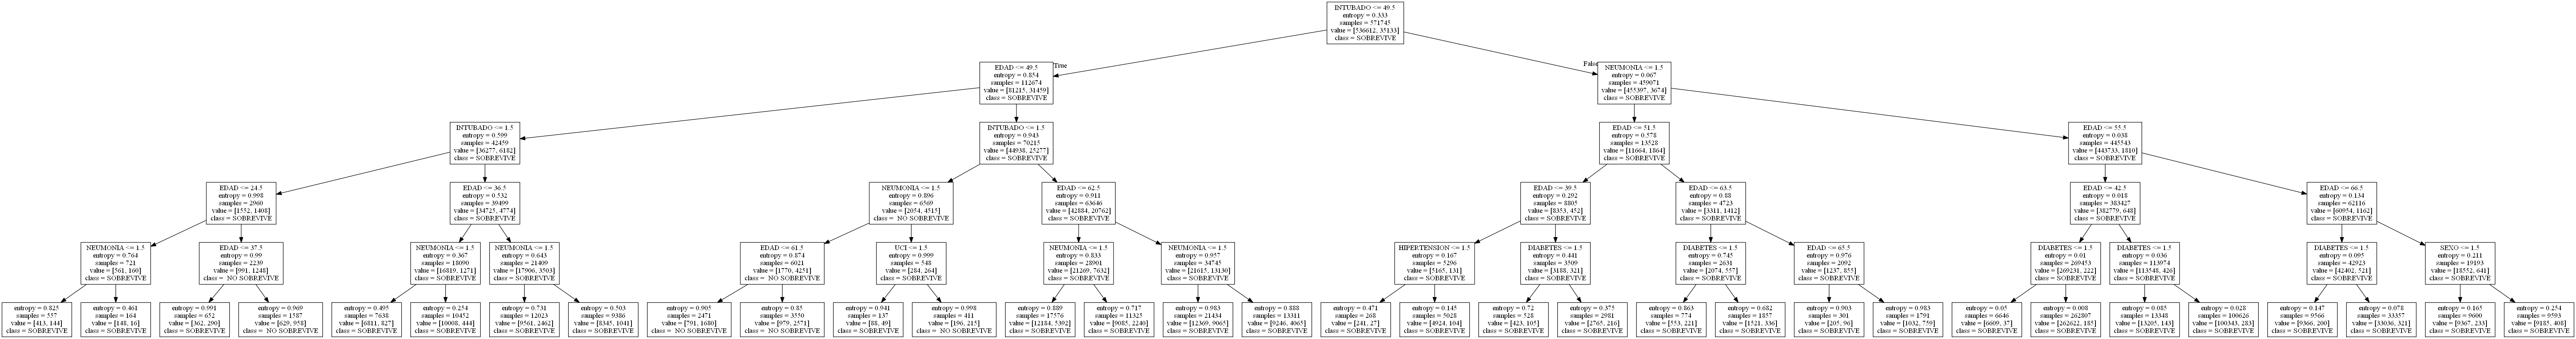

In [12]:

#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

In [13]:
# training["SEXO"] = training["SEXO"].apply(lambda toLabel: "HOMBRE" if toLabel == 2 else "MUJER")


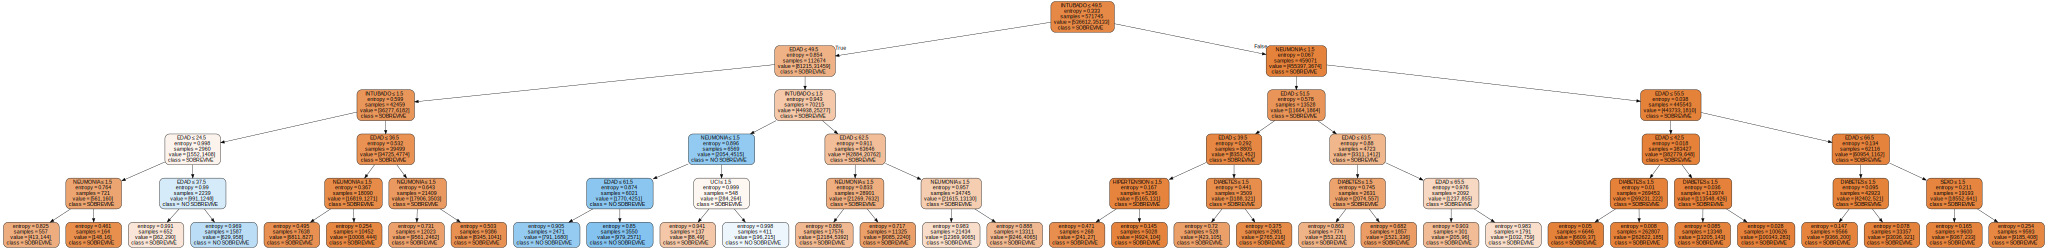

In [14]:

import sklearn
#from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("CovidColor", format='png')
graph

### Parte 2: Aplicar el modelo del árbol de decisiones.

In [89]:
#verify the data preparation steps. Enter and run both methods from here, by entering and running one and then the other.
testing.head(10)
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307863 entries, 253267 to 56573
Data columns (total 35 columns):
FECHA_ACTUALIZACION    307863 non-null object
ID_REGISTRO            307863 non-null object
ORIGEN                 307863 non-null int64
SECTOR                 307863 non-null int64
ENTIDAD_UM             307863 non-null int64
SEXO                   307863 non-null int64
ENTIDAD_NAC            307863 non-null int64
ENTIDAD_RES            307863 non-null int64
MUNICIPIO_RES          307863 non-null int64
TIPO_PACIENTE          307863 non-null int64
FECHA_INGRESO          307863 non-null object
FECHA_SINTOMAS         307863 non-null object
FECHA_DEF              307863 non-null int64
INTUBADO               307863 non-null int64
NEUMONIA               307863 non-null int64
EDAD                   307863 non-null int64
NACIONALIDAD           307863 non-null int64
EMBARAZO               307863 non-null int64
HABLA_LENGUA_INDIG     307863 non-null int64
DIABETES               307

In [90]:
X_input = testing[list(columns)].values

In [93]:

#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head(50)

,Est_Survival,ID_REGISTRO
253267,0,1587fb
536940,0,0ecbbd
128318,0,129439
798327,0,02b9b8
314209,0,015f06
628192,0,1d8ed4
361457,0,182f49
360397,0,141c93
251622,0,06e41a
111430,0,1c0d75


In [95]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
#import the file into the 'testing' dataframe.
all_data = pd.read_csv("covi.csv",encoding = "ISO-8859-1")
all_data["FECHA_DEF"] = all_data["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','FECHA_DEF']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['FECHA_DEF']) / float(len(testing_results))
# Print the result
acc

0.942899926265904

In [99]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("covi.csv", usecols=["SEXO", "EDAD","EMBARAZO" ,"INTUBADO", "NEUMONIA", "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA", "TABAQUISMO", "UCI","FECHA_DEF"])

#View info for the new dataframe

In [100]:
all_data["FECHA_DEF"] = all_data["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)


In [101]:
all_data.head()

,SEXO,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI
0,2,0,97,2,28,97,2,2,2,2,2,2,2,2,2,97
1,2,0,2,1,49,97,2,2,2,2,2,2,1,2,2,2
2,1,1,2,1,67,2,2,2,2,2,1,2,1,2,2,2
3,1,0,97,2,41,2,2,2,2,2,2,2,2,2,2,97
4,2,0,2,1,43,97,2,2,2,2,2,2,2,2,2,2


In [103]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["FECHA_DEF"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)




In [104]:
type(X_train)

numpy.ndarray

In [107]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


In [108]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)


Training score = 0.9434084173986858 Testing score = 0.9430571503279863


## Parte 2. Sin tomar en cuenta las variables: UCI, Neumonia e Intubado)

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split

#create a pandas dataframe called "training" from the titanic-train.csv file

df = pd.read_csv("covi.csv",encoding = "ISO-8859-1")
df["FECHA_DEF"] = df["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)

#training["UCI"] = training["UCI"].apply(lambda toLabel: 1 if toLabel == 'UCI' else 0)
training, testing = train_test_split(df, test_size = 0.35)


In [110]:
#code cell 8
#create the array for the target values
y_target = training["FECHA_DEF"].values
#code cell 9
columns = ["SEXO", "EDAD","EMBARAZO" , "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA", "TABAQUISMO"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [111]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)
#code cell 11
clf_train.score(X_input,y_target)

0.9382959186350558

In [112]:
clasificacion=['SOBREVIVE',' NO SOBREVIVE']
import sklearn
#from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

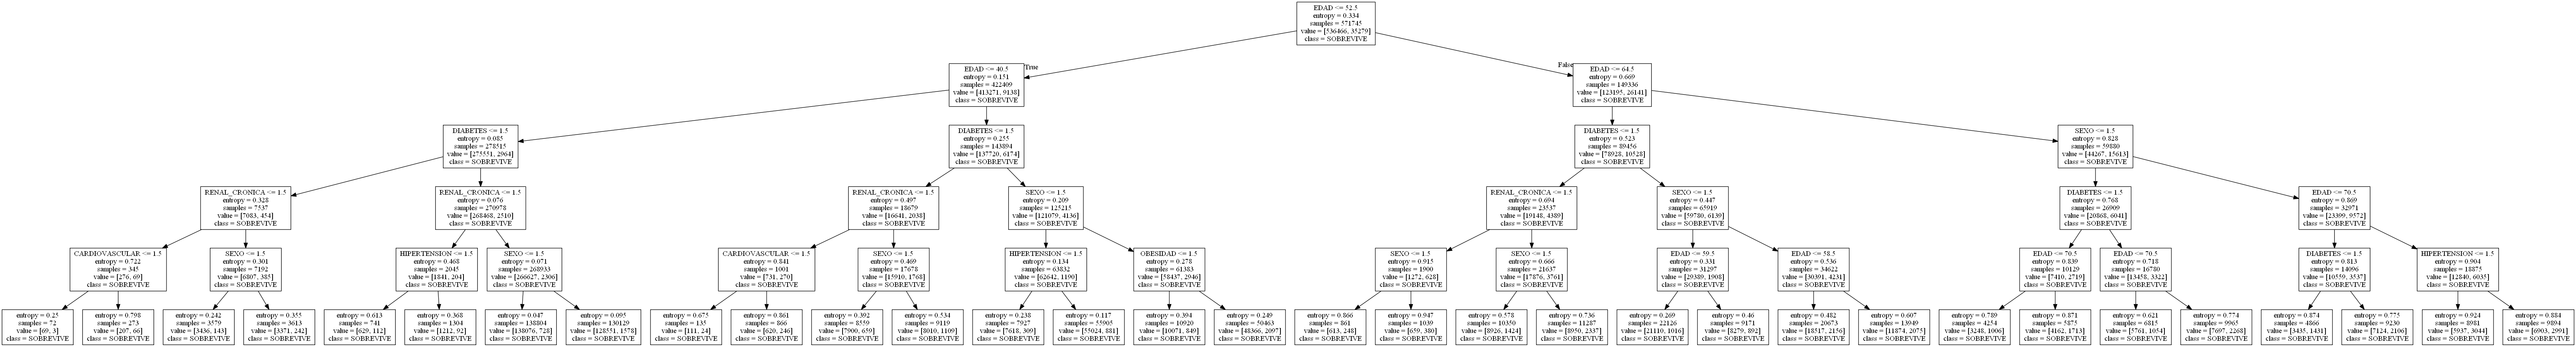

In [113]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng covid.dot -o covid.png
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

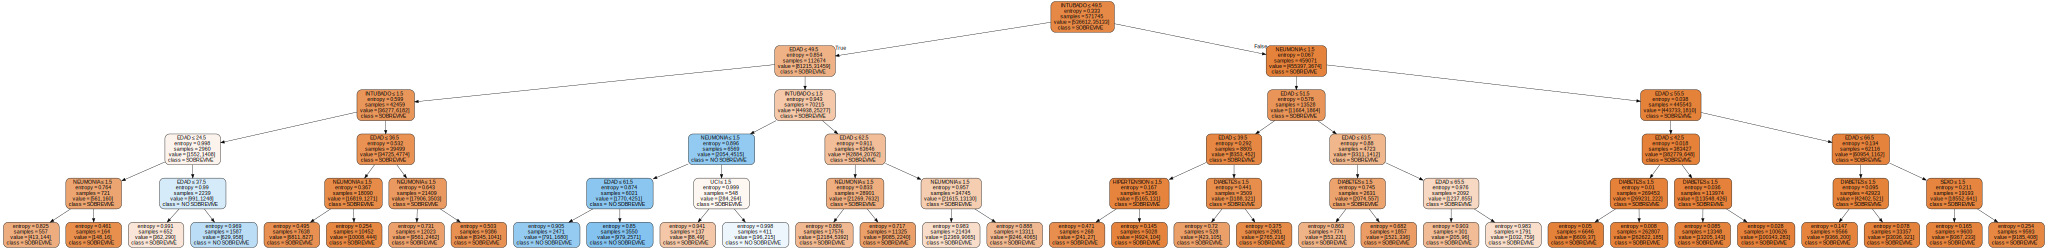

In [15]:

import sklearn
#from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("CovidColor", format='png')
graph

In [121]:
testing.head()
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307863 entries, 489708 to 562136
Data columns (total 35 columns):
FECHA_ACTUALIZACION    307863 non-null object
ID_REGISTRO            307863 non-null object
ORIGEN                 307863 non-null int64
SECTOR                 307863 non-null int64
ENTIDAD_UM             307863 non-null int64
SEXO                   307863 non-null int64
ENTIDAD_NAC            307863 non-null int64
ENTIDAD_RES            307863 non-null int64
MUNICIPIO_RES          307863 non-null int64
TIPO_PACIENTE          307863 non-null int64
FECHA_INGRESO          307863 non-null object
FECHA_SINTOMAS         307863 non-null object
FECHA_DEF              307863 non-null int64
INTUBADO               307863 non-null int64
NEUMONIA               307863 non-null int64
EDAD                   307863 non-null int64
NACIONALIDAD           307863 non-null int64
EMBARAZO               307863 non-null int64
HABLA_LENGUA_INDIG     307863 non-null int64
DIABETES               30

In [117]:
X_input = testing[list(columns)].values
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,ID_REGISTRO
489708,0,15605f
799251,0,1d9373
149085,0,1a2a45
251657,0,0477dc
296126,0,128fea


In [118]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
#import the file into the 'testing' dataframe.
all_data = pd.read_csv("covi.csv",encoding = "ISO-8859-1")
all_data["FECHA_DEF"] = all_data["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','FECHA_DEF']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['FECHA_DEF']) / float(len(testing_results))
# Print the result
acc

0.9378879566560451

In [119]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("covi.csv", usecols=["SEXO", "EDAD","EMBARAZO" , "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA", "TABAQUISMO","FECHA_DEF"])
all_data["FECHA_DEF"] = all_data["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)
all_data.head()
#View info for the new dataframe

,SEXO,FECHA_DEF,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,2,0,28,97,2,2,2,2,2,2,2,2,2
1,2,0,49,97,2,2,2,2,2,2,1,2,2
2,1,1,67,2,2,2,2,2,1,2,1,2,2
3,1,0,41,2,2,2,2,2,2,2,2,2,2
4,2,0,43,97,2,2,2,2,2,2,2,2,2


In [120]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["FECHA_DEF"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)
type(X_train)


numpy.ndarray

In [122]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)


Training score = 0.9382432299285287 Testing score = 0.9380179852434601


## Conclusiones.

Es importante ver como ha evolucionado el conocimiento del ser humano al punto de poder realizar una prediccion muy buena para estimar la supervivencia en este caso de las personas para poder ver que factores influyen en la salud o en si sobreviviran o no a cierta enfermedad. 
Podemos observar las diferentes probabilidades que nos brinda nuestro modelo.

En primera instancia contando los valores de "UCI,INTUBADO y NEUMONIA"
Nuestro modelo nos dio de resultado: 0.942899926265904
Y en training y testing score: Training score = 0.9434084173986858 Testing score = 0.9430571503279863

Y sin contar contando los valores de "UCI,INTUBADO y NEUMONIA"
Nuestro modelo nos dio de resultado: 0.9378879566560451
Y en training y testing score: Training score = 0.9382432299285287 Testing score = 0.9380179852434601.